# <center> **DSCI 100 Project: Predicting Usage of a Video Game Server**
# <center> **Final Report**

## Introduction

- Do we need to include, mention and describe the other dataset if we are not going to use it?  Also do we need to include the broad question(s)?
- Check if it is okay to have a paragraph and not written embedded with code?
- Does my table have to be for all variables or just those of interest?
- Methods: "performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis"  Is it possible to not have this necessary?
- We are told to load data in the Methods section, but if we perform summary statistics in intro is it okay to do that in the intro?

A group of Computer Science students, led by Frank Wong, at UBC created a Minecraft server and recorded player demographics and play sessions data in two data frames.  The goal of their study was to learn how people play video games and determine ways to target recruitment efforts and have enough resources, such as softwware licences, in order to manage the number of users on their server.

This project report aims to answer a specific question within one of their broader question of interest: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"  The specific question that this project intends to answer is: 'Can age and amount of time playing video games predict whether or not a player has subscribed to the Minecraft newsletter in the players dataset?'  This question asks to predict the main categorical variable (`subscribe`) in the dataset of which there are two groups: "TRUE" and "FALSE".  Thus, it is a classification problem and K-nearest neighbours will be used in this analysis.

The dataset of player demographics is used to answer the question to help better understand the player characteristics that are predictive of subscribing to a gaming newsletter.  There are 7 variables and 196 observations of the dataset which means that 7 variables were recorded for 196 players.  The dataset consists of data for MineCraft video game players of different ages with varying levels of experience in gaming and number of hours played (dbl). The logistics of their name (chr), gender (chr), age (dbl), email (chr), experience (chr) and whether they have subscribed to the newsletter (lgl) are included. 

A potential issue with the dataset is that the `subscribe` variable is logical type but should be factor type in order to treat it as a categorical variable for classification.  This column also contains far more 'true' than 'false' categories which may create an imbalanace in the data and affect the K-nearest neighbours algorithm.  Note that the additional variables such as  `gender` or `experience` are not used as predictor variables in the analysis and therefore can be removed in the data wrangling step.





Outcome Variable: The main outcome/categorical/label variable in the dataset is the 'subscribe' variable which describes whether or not a player has subscribed to the Minecraft newsletter. Thus, there are two groups within the category: "TRUE" or "FALSE". We can double check using the distinct function below.

Load themis package to upsample the data.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(themis) # To upsample the data
options(repr.matrix.max.rows = 6)
set.seed(1) # For reproducibility

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_orig <- read_csv("players.csv")
players_orig

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
# Check the categories under the "subscribe" variable
players_orig |>
    distinct(subscribe)

# Determine the number of observations in each category of "True" and "False"
num_subscribe <- players_orig |>
    group_by(subscribe) |>
    summarize(count = n())
num_subscribe

# Calculate summary statistics for variables in the dataset
stats_players <- players_orig |>
    summarize(mean_age = mean(Age, na.rm = TRUE), min_age = min(Age, na.rm = TRUE), max_age = max(Age, na.rm = TRUE),
             mean_hours = mean(played_hours), min_hours = min(played_hours), max_hours = max(played_hours))
stats_players

# Try to put summary statistics in one cell.  Don't print them yet.  Create a table (1 cell) for those results (ideally in one cell).

subscribe
<lgl>
TRUE
FALSE


subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


mean_age,min_age,max_age,mean_hours,min_hours,max_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,8,50,5.845918,0,223.1


In [4]:
stats_table <- data.frame(
    Statistic = c("Data Type", "Mean", "Min", "Max"),
    Age = c("Double", 20.52, 8, 50),
    Hours = c("Double", 5.85, 0, 233.1),
    Subscribe = c("Logical", NA, NA, NA), 
    Experience = c("Character", NA, NA, NA),
    Name = c("Character", NA, NA, NA), 
    Gender = c("Character", NA, NA, NA) 
)
stats_table

Statistic,Age,Hours,Subscribe,Experience,Name,Gender
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Data Type,Double,Double,Logical,Character,Character,Character
Mean,20.52,5.85,NA,NA,NA,NA
Min,8,0,NA,NA,NA,NA
Max,50,233.1,NA,NA,NA,NA


## Methods

### Clean and Wrangle the Data
We will select the hashedEmail (to keep the identification of individual players), Age, played_hours and subscribe columns.  Since we consider `subscribe` as a categorical variable, we will convert it into a factor type variable using the `as_factor()` function.  Overall, the dataset is tidy because each variable forms a column, each observation forms a row and each cell is a single value.

In [5]:
players <- players_orig |>
    mutate(subscribe = as_factor(subscribe)) |>
    select(hashedEmail, Age, played_hours, subscribe)
players

hashedEmail,Age,played_hours,subscribe
<chr>,<dbl>,<dbl>,<fct>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,9,30.3,TRUE
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,17,3.8,TRUE
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,17,0.0,FALSE
⋮,⋮,⋮,⋮
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,17,0.0,FALSE
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,17,2.3,FALSE
d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,NA,0.2,TRUE


### Create a Visualization for Exploratory Analysis

To explore the dataset, we create a scatter plot of the data with `Age` on the x-axis and `played_hours` on the y-axis before standardizing any variables, and we colour the observations according to their gaming newsletter subscription status.  We can observe that many of the 196 observations are plotted very closely together, causing overplotting.  

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


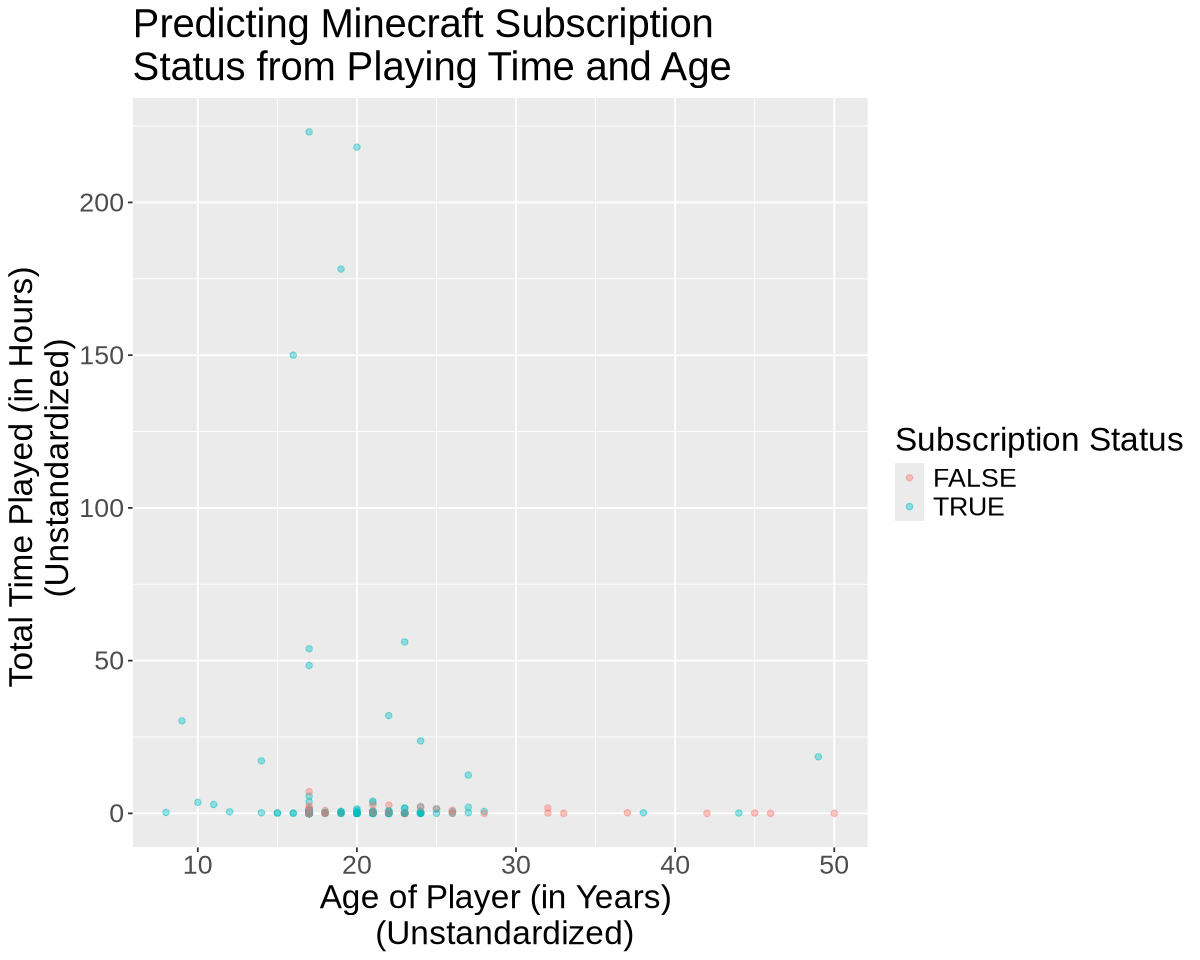

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
players_scatter <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_point(aes(color = subscribe), alpha = 0.4) +
        xlab("Age of Player (in Years) \n (Unstandardized)") +
        ylab("Total Time Played (in Hours) \n (Unstandardized)") +
        labs(color = "Subscription Status", title = "Predicting Minecraft Subscription \nStatus from Playing Time and Age") +
        theme(text = element_text(size = 20))
players_scatter

It is difficult to find patterns, relationships or gain insight from the data and visually analyze the plot with K-nearest neighbours.  Since there are only 4 players that have played above 60 hours, we will cut off the top of the plot above 60 hours by limiting the y-axis and not removing any data points from the dataset.

We will double check how many observations are above 60 played hours with the code below and observe that there are only 4 observations.

In [7]:
players |> 
    filter(played_hours > 60) |>
    group_by(played_hours) |>
    summarize(count = n()) 

played_hours,count
<dbl>,<int>
150.0,1
178.2,1
218.1,1
223.1,1


Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


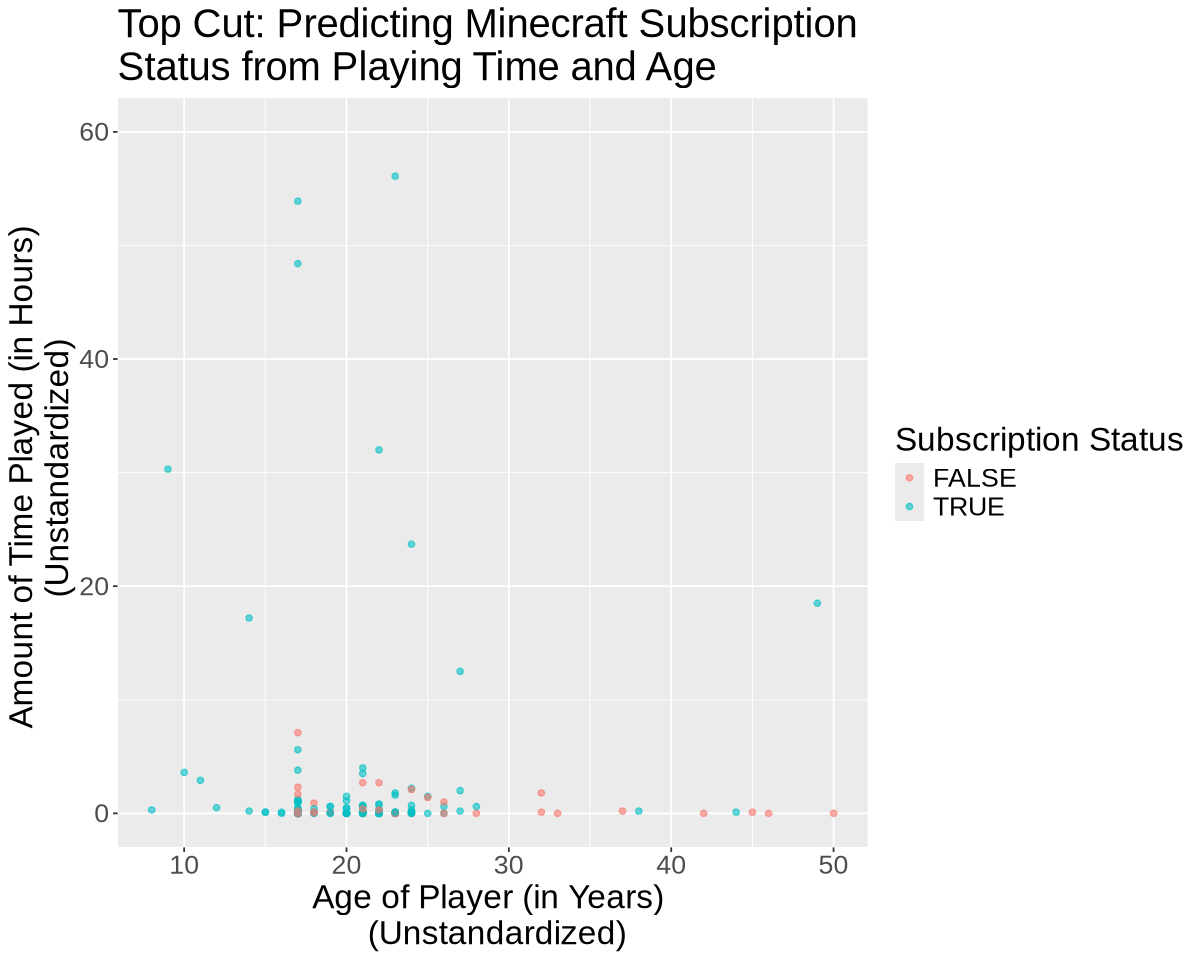

In [8]:
players_scatter_cut <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_point(aes(color = subscribe), alpha = 0.6) +
        xlab("Age of Player (in Years) \n (Unstandardized)") +
        ylab("Amount of Time Played (in Hours) \n (Unstandardized)") +
        ylim(0, 60) +
        labs(color = "Subscription Status", title = "Top Cut: Predicting Minecraft Subscription \nStatus from Playing Time and Age") +
        theme(text = element_text(size = 20))
players_scatter_cut

The plot above has considerably more data points that are "true" than "false", so we will upsample the data to balance the categories of the response variable.  

In [9]:
ups_recipe <- recipe(subscribe ~ Age + played_hours, data = players) |>
    step_upsample(subscribe, over_ratio = 1, skip = FALSE) |>
    prep()
ups_recipe

ups_players <- bake(ups_recipe, players)



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Training information 

Training data contained 196 data points and 2 incomplete rows.



── Operations 

• Up-sampling based on: subscribe | Trained



The method we are using in this analysis is k-nearest neighbours classification because we are predicting the class of a categorical variable (`subscribe`) and not a quantitative variable, in which case we would use regression.  Furthermore, k-nearest neighbours is a simple algorithm that does not have many requirements or assumptions for how the data should look.  The k-nearest neighbours algorithm involves distance calculations between data points and assumes that nearby observations are more similar than farther ones.  So, it is important to standardize the data so that the predictor variables are on comparable scales.  Potential limitations of using knn classification in this analysis is that it becomes slower with a larger training set and it is sensitive to class imbalance and scaled variables.  Other models have not been learnt in this class, so we are answering the predictive question using only k-nearest neighbours.

Now that the data is balanced, we will use functions from the tidymodels package to partition the players dataset into a training (75%) and testing (25%) set in order to evaluate the model on new data and not be required to collect more data.  The plot above shows that the scales of the variables are uncomparable since the time played has a larger range than the age, so we will standardize the variables by centering the mean to 0 and scaling to have a standard deviation of 1.

In [10]:
players_split <- initial_split(ups_players, prop = 0.75, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Centering for: all_predictors()

• Scaling for: all_predictors()



We will create a knn model specification and perform 5-fold cross-validation and create a plot for accuracy versus k values in order to evaluate the model for each k and select the most optimal k value. Note that the error below is not related to the output.

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 43 rows.
               ✖ Assigned data has 44 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 44 to size 43.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 41 rows.
               ✖ Assigned data has 42 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 42 to size 41.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6461039,3,0.01974923,Preprocessor1_Model01
2,accuracy,binary,0.6612554,3,0.01129903,Preprocessor1_Model02
3,accuracy,binary,0.6078644,3,0.02046126,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,binary,0.5537518,3,0.05912675,Preprocessor1_Model08
9,accuracy,binary,0.5461760,3,0.02625311,Preprocessor1_Model09
10,accuracy,binary,0.5386003,3,0.03311248,Preprocessor1_Model10


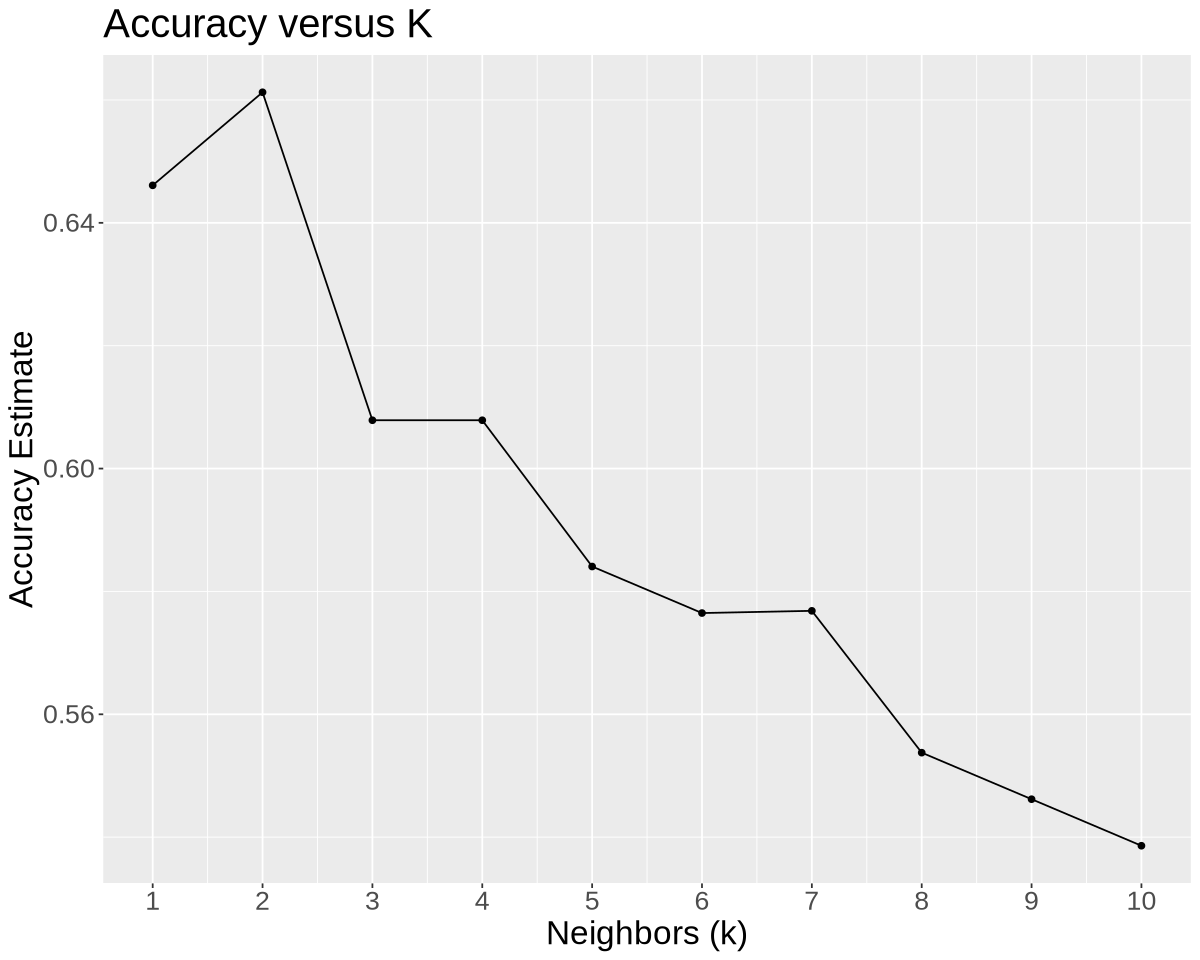

In [24]:
set.seed(1)

# Create a model specification
players_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Perform 5-fold cross-validation 
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

# Create a tibble of k values
gridvals <- tibble(neighbors = seq(1, 10, by = 1))

# Create a workflow analysis and fit the model for each k value
players_knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_knn_spec) |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics()

# Filter for accuracies
accuracies <- players_knn_results |>
    filter(.metric == "accuracy")
accuracies

# Create a cross-validation plot of accuracies versus k
cross_val_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors (k)", y = "Accuracy Estimate", title = "Accuracy versus K") +
        scale_x_continuous(breaks = seq(1, 10, by = 1)) +  
        theme(text = element_text(size = 20))
cross_val_plot

According the plot above, there is a peak at k = 2, but this value is small and could cause overfitting on the data which would make it unreliable to classify new data.  I would choose k = 3 because it provides a high cross-validation accuracy estimate of approximately 61% which is close to the peak value and increasing or decreasing k to a nearby value changes the estimated accuracy by only a small amount.  Moreover, choosing a value near k = 3 such as k = 4 could also be justified because the estimated accuracy of the classifier is close and different by only a small amount.  Eeven though there is a peak in accuracy at k = 3, it does not mean that the model is more accurate with the value because the values are estimates for the classifier's true accuracy.

We will retrain the model on the training data using k = 3.

In [27]:
# Retrain the model on the training data with k = 3
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

# Fit the model onto the training data
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)

We will now predict on the test dataset using the final model and calculate the accuracy of the prediction.

In [28]:
players_predictions <- predict(players_fit, players_testing) |>
    bind_cols(players_testing)
players_predictions

players_metrics <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)
players_metrics

players_conf_mat <- players_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
players_conf_mat

.pred_class,Age,played_hours,subscribe
<fct>,<dbl>,<dbl>,<fct>
FALSE,28,0,FALSE
TRUE,22,0,FALSE
FALSE,26,1,FALSE
⋮,⋮,⋮,⋮
TRUE,19,0.6,TRUE
TRUE,21,0.1,TRUE
FALSE,17,0.0,TRUE


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7083333
kap,binary,0.4166667


          Truth
Prediction FALSE TRUE
     FALSE    33   18
     TRUE      3   18

Precision = correct positive predictions / total positive predictions 

In [21]:
precision <- 18/21 
precision

[1] 0.8571429

Recall = correct positive predictions / total positive observations 

In [23]:
recall <- 18/36
recall

[1] 0.5

## Results

The optimal k value is 3 and the accuracy of the model is 70.8%, the precision is 85.7% and the recall is 50.0%.  The low recall was not expected because ... This may be low because ...  the plot has overplotting?  Another model might be good?  Future trials of logarithm scaling?  Future questions are which predictors are the predictors that will best predict subscription status of a player?  Note: Most players subscribe, so how can we increase the number even further.

## Discussion

## References